# AQI AND HOSPITALIZATION RATE ANALYSIS

### In this notebook, we merge the two datasets for AQI and Covid patients to see the correlation between AQI and Hospitalization rates. We also observe if there exist any confounding factors or not that should be controlled for. We use libraries like matplolib, plotly and seaborn to visualize the data to get insights.

### Importing Libraries

In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
import plotly.express as px

### Loading the dataset

In [3]:
# reading the csv file that contains clean data of the covid patients
df1 = pd.read_csv("Final_Cleaned.csv")

In [3]:
df1.describe()

,Unnamed: 0,year,month
count,1.700846e+07,1.700846e+07,1.700846e+07
mean,1.822152e+07,2.020488e+03,7.219431e+00
std,1.077483e+07,4.998470e-01,3.733490e+00
min,2.000000e+00,2.020000e+03,1.000000e+00
25%,8.872771e+06,2.020000e+03,4.000000e+00
50%,1.792942e+07,2.020000e+03,8.000000e+00
75%,2.753454e+07,2.021000e+03,1.100000e+01
max,3.746472e+07,2.021000e+03,1.200000e+01


In [4]:
df1.head()

,Unnamed: 0,res_state,res_county,age_group,sex,current_status,symptom_status,hosp_yn,year,month
0,2,MO,CASS,0 - 17 years,Female,Laboratory-confirmed case,Symptomatic,Unknown,2020,10
1,5,OH,HOLMES,0 - 17 years,Female,Laboratory-confirmed case,Symptomatic,No,2020,12
2,13,MO,HOWELL,50 to 64 years,Female,Laboratory-confirmed case,Symptomatic,Unknown,2020,7
3,14,WI,SHAWANO,50 to 64 years,Female,Laboratory-confirmed case,Symptomatic,No,2021,9
4,15,MI,CHARLEVOIX,65+ years,Female,Laboratory-confirmed case,Symptomatic,Yes,2020,12


Dropping saved index column

In [5]:
df1.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df1.head()

Reading the aqi info dataset for 2020 and 2021 as these two years were prominent for the Covid-19 to spread in the United States and lockdown was imposed during these times

In [6]:
aqi_2020 = pd.read_csv("https://emd-coding-challenge.s3.us-east-2.amazonaws.com/covid-19-aqi/aqi/daily_aqi_by_county_2020.csv.bz2",compression="bz2")
aqi_2021 = pd.read_csv("https://emd-coding-challenge.s3.us-east-2.amazonaws.com/covid-19-aqi/aqi/daily_aqi_by_county_2021.csv.bz2",compression="bz2")

Merging the dataset for 2020 and 2021 into a single dataframe

In [7]:
# concatenates two dataframes
aqi = pd.concat([aqi_2020,aqi_2021],ignore_index=True)

### Dataset Exploration

In [6]:
aqi.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1


In [9]:
aqi.dtypes

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object

### Dataset Column Data Types

The dataset comprises various fields, each representing specific attributes of the AQI and hospitalization data. Below is a description of each column along with its data type:

- `State Name`: `object` - Represents the name of the state as a text string.
- `county Name`: `object` - Contains the name of the county as a text string.
- `State Code`: `int64` - An integer representing a unique code assigned to each state.
- `County Code`: `int64` - An integer representing a unique code assigned to each county.
- `Date`: `object` - The date of the observation recorded as a text string. This may require conversion to a datetime format for time series analysis.
- `AQI`: `int64` - The Air Quality Index, which is a numerical representation of the area's air quality.
- `Category`: `object` - A categorical description of the AQI, indicating the level of health concern.
- `Defining Parameter`: `object` - Specifies the pollutant that determines the AQI on a given day.
- `Defining Site`: `object` - The identifying code of the site where the defining parameter was measured.
- `Number of Sites Reporting`: `int64` - The count of sites that report AQI data, represented as an integer.

Understanding the data types is crucial for preprocessing the data appropriately. For instance, converting date strings to datetime objects will be necessary for any temporal analyses. Similarly, categorical data encoded as objects might require transformation into numerical codes if they are to be used in certain types of statistical models.


In [7]:
aqi.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,554897.000000,554897.000000,554897.000000,554897.000000
mean,30.415639,82.054871,37.935736,1.993984
std,15.964950,90.896386,23.213370,2.364063
min,1.000000,1.000000,0.000000,1.000000
25%,17.000000,25.000000,27.000000,1.000000
50%,30.000000,61.000000,37.000000,1.000000
75%,42.000000,109.000000,45.000000,2.000000
max,80.000000,840.000000,2723.000000,34.000000


## Statistical Summary of Dataset Columns

### Summary of Index and Date Information

The dataset includes columns for an unnamed index, the year, and the month. Here's a summary of their statistical characteristics:

- **Unnamed Index Column:**
  - **Count:** 17 million entries, indicating the size of the dataset.
  - **Mean and Standard Deviation:** The mean is around 18.22 million with a standard deviation of approximately 10.77 million, suggesting a wide spread in the index values.
  - **Range:** The index ranges from 2 to about 37.46 million.

- **Year:**
  - **Count:** 17 million entries, consistent across the dataset.
  - **Mean:** Averages around 2020.49, indicating the dataset spans the years 2020 and 2021.
  - **Standard Deviation:** Approximately 0.5, consistent with a dataset spanning two years.

- **Month:**
  - **Count:** 17 million entries, complete data for months.
  - **Mean:** Around 7.22, indicating data might be more weighted towards the latter half of the year.
  - **Standard Deviation:** 3.73, showing distribution across all months.

### Summary of AQI and Related Information

The dataset also includes detailed information about AQI readings, state and county codes, and the number of reporting sites:

- **State Code and County Code:**
  - **Count:** Over 554,000 entries for both.
  - **Mean:** The average state code is around 30.42, and the county code is about 82.05.
  - **Standard Deviation:** Indicates variability in the geographical spread of the data.

- **AQI:**
  - **Count:** Over 554,000 entries.
  - **Mean:** The average AQI value is approximately 37.94.
  - **Standard Deviation:** About 23.21, showing variation in AQI values.
  - **Range:** AQI values range from 0 to 2723, indicating a wide range of air quality conditions.

- **Number of Sites Reporting:**
  - **Mean:** Around 1.99, suggesting that on average, data comes from about two sites per entry.
  - **Standard Deviation:** 2.36, reflecting variability in the number of reporting sites.
  - **Range:** From 1 to 34, indicating some regions have more reporting sites.

These summaries provide valuable insights into the structure and distribution of our data, laying the foundation for more in-depth analysis. The range and variability in AQI and the number of reporting sites are particularly notable, as they can influence the interpretation of air quality trends and their potential health impacts.


### Missing values

In [8]:
aqi.isnull().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

As we can see, there are no missing values in this dataset

In [13]:
# converting the Date from string format to datetime format to extract year and month
aqi['Date'] = pd.to_datetime(aqi['Date'], errors='coerce')

Extracting day, year and month from date

In [14]:
aqi['year'] = aqi['Date'].dt.year
aqi['month'] = aqi['Date'].dt.month
aqi['day'] = aqi['Date'].dt.day

In [12]:
aqi.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,year,month,day
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1,2020,1,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1,2020,1,4
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1,2020,1,7
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1,2020,1,10
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1,2020,1,13


Creating a new dataframe for processing the data independently

In [15]:
aqi_new = aqi[['State Name','county Name','Date','AQI','year','month','day','Number of Sites Reporting']]

In [22]:
aqi_new.head()

,State Name,county Name,Date,AQI,year,month,day,Number of Sites Reporting
0,Alabama,Baldwin,2020-01-01,48,2020,1,1,1
1,Alabama,Baldwin,2020-01-04,13,2020,1,4,1
2,Alabama,Baldwin,2020-01-07,14,2020,1,7,1
3,Alabama,Baldwin,2020-01-10,39,2020,1,10,1
4,Alabama,Baldwin,2020-01-13,29,2020,1,13,1


Now we introduce a new column as weighted AQI as we need to calculate the average AQI for a month for a particular county. Hence we calculate weighted_aqi = AQI*No of sites

In [16]:
aqi_new['weighted_aqi'] = aqi_new['AQI']*aqi_new['Number of Sites Reporting']


/tmp/ipykernel_4559/2309876820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_new['weighted_aqi'] = aqi_new['AQI']*aqi_new['Number of Sites Reporting']


In [24]:
aqi_new.head()

,State Name,county Name,Date,AQI,year,month,day,Number of Sites Reporting,weighted_aqi
0,Alabama,Baldwin,2020-01-01,48,2020,1,1,1,48
1,Alabama,Baldwin,2020-01-04,13,2020,1,4,1,13
2,Alabama,Baldwin,2020-01-07,14,2020,1,7,1,14
3,Alabama,Baldwin,2020-01-10,39,2020,1,10,1,39
4,Alabama,Baldwin,2020-01-13,29,2020,1,13,1,29


In [17]:
# grouping the dataset by State county year and month 

grouped = aqi_new.groupby(['State Name', 'county Name', 'year', 'month'])
weighted_avg_aqi = grouped['weighted_aqi'].sum() / grouped['Number of Sites Reporting'].sum()
weighted_avg_aqi = weighted_avg_aqi.reset_index(name='Weighted_Average_AQI')

#Merge this result back into the original DataFrame
aqi_new = aqi_new.merge(weighted_avg_aqi, on=['State Name', 'county Name', 'year', 'month'], how='left')

In [26]:
aqi_new.head()

,State Name,county Name,Date,AQI,year,month,day,Number of Sites Reporting,weighted_aqi,Weighted_Average_AQI
0,Alabama,Baldwin,2020-01-01,48,2020,1,1,1,48,24.818182
1,Alabama,Baldwin,2020-01-04,13,2020,1,4,1,13,24.818182
2,Alabama,Baldwin,2020-01-07,14,2020,1,7,1,14,24.818182
3,Alabama,Baldwin,2020-01-10,39,2020,1,10,1,39,24.818182
4,Alabama,Baldwin,2020-01-13,29,2020,1,13,1,29,24.818182


Now we group the above dataframe in such a way that we have weighted AQI for each county month wise

In [27]:
grouped_df = aqi_new.groupby(['year', 'month', 'State Name', 'county Name', 'Weighted_Average_AQI']).size().reset_index(name='Counts')

# Drop the 'Counts' column which was added just to facilitate grouping
grouped_df.drop('Counts', axis=1, inplace=True)

# print(grouped_df)

In [28]:
grouped_df.head()

,year,month,State Name,county Name,Weighted_Average_AQI
0,2020,1,Alabama,Baldwin,24.818182
1,2020,1,Alabama,Clay,18.714286
2,2020,1,Alabama,DeKalb,32.750000
3,2020,1,Alabama,Etowah,22.500000
4,2020,1,Alabama,Jefferson,47.353383


## Merging Datasets with State Abbreviations and County Name Adjustments

To prepare for merging two datasets – one with AQI data and the other with COVID-19 related information – we first standardize the state and county names.

### Steps for Data Standardization and Merging:

1. **State Name Abbreviation:**
   - We create a mapping dictionary (`state_mapping`) that maps full state names to their respective two-letter abbreviations.
   - Using this mapping, we convert the full state names in the AQI dataset to their abbreviations for consistency with the COVID-19 dataset.

2. **Uppercase County Names:**
   - To ensure a match during merging, we convert all county names in the AQI dataset to uppercase.

3. **Merging Datasets:**
   - We then merge the two datasets on common columns: 'state', 'county', 'year', and 'month'.
   - The merge is performed using a left join, ensuring that all entries from the primary dataset (`df1`) are retained, even if there is no corresponding entry in the AQI dataset.

4. **Renaming and Handling Missing AQI:**
   - After merging, we rename the 'Weighted_Average_AQI' column to 'AQI' for clarity.
   - Missing values in the 'AQI' column are filled with 'missing' to indicate the absence of AQI data.

5. **Dropping Redundant Columns:**
   - Post-merge, we drop the now-redundant 'State Name' and 'county Name' columns from the merged dataset.

This merging process effectively combines the AQI information with the COVID-19 case data, allowing for a comprehensive analysis of how air quality may correlate with COVID-19 hospitalization rates. Standardizing state and county names ensures accurate matching and integrity of the merged data.


In [37]:
# Mapping of state names to abbreviations
state_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert state names to abbreviations in the AQI dataset
grouped_df['State Name'] = grouped_df['State Name'].map(state_mapping)

# Convert county names to uppercase in the AQI dataset
grouped_df['county Name'] = grouped_df['county Name'].str.upper()

# Merge the datasets on state, county, year, and month
merged_df = df1.merge(grouped_df, left_on=['res_state', 'res_county', 'year', 'month'],
                      right_on=['State Name', 'county Name', 'year', 'month'], 
                      how='left')

merged_df.rename(columns={'Weighted_Average_AQI': 'AQI'}, inplace=True)
merged_df['AQI'].fillna('missing', inplace=True)


# Drop extra columns if needed
merged_df.drop(['State Name', 'county Name'], axis=1, inplace=True)

# print(merged_df)


In [38]:
merged_df.shape

(17008463, 10)

In [40]:
merged_df.head()

,res_state,res_county,age_group,sex,current_status,symptom_status,hosp_yn,year,month,AQI
0,MO,CASS,0 - 17 years,Female,Laboratory-confirmed case,Symptomatic,Unknown,2020,10,33.2903
1,OH,HOLMES,0 - 17 years,Female,Laboratory-confirmed case,Symptomatic,No,2020,12,missing
2,MO,HOWELL,50 to 64 years,Female,Laboratory-confirmed case,Symptomatic,Unknown,2020,7,missing
3,WI,SHAWANO,50 to 64 years,Female,Laboratory-confirmed case,Symptomatic,No,2021,9,missing
4,MI,CHARLEVOIX,65+ years,Female,Laboratory-confirmed case,Symptomatic,Yes,2020,12,missing


As we replaced missing keyword for missing values. We replace it as NaN to handle missing values

In [43]:
merged_df.replace("missing",np.nan,inplace=True)

In [45]:
merged_df.isnull().sum()

res_state               0
res_county              0
age_group               0
sex                     0
current_status          0
symptom_status          0
hosp_yn                 0
year                    0
month                   0
AQI               4532912
dtype: int64

There are 4532912 missing values for AQI. At this point, replacing AQI with mean would create a flat distribution giving us no insights into the data. Hence we decide to drop the columns

In [46]:
merged_df.dropna(inplace=True)

In [48]:
merged_df.isnull().sum()

res_state         0
res_county        0
age_group         0
sex               0
current_status    0
symptom_status    0
hosp_yn           0
year              0
month             0
AQI               0
dtype: int64

In [50]:
merged_df.head()

,res_state,res_county,age_group,sex,current_status,symptom_status,hosp_yn,year,month,AQI
0,MO,CASS,0 - 17 years,Female,Laboratory-confirmed case,Symptomatic,Unknown,2020,10,33.290323
6,PA,WARREN,50 to 64 years,Male,Laboratory-confirmed case,Symptomatic,Unknown,2021,2,11.611111
7,OR,JEFFERSON,18 to 49 years,Male,Laboratory-confirmed case,Symptomatic,No,2020,9,133.233333
9,VA,VIRGINIA BEACH CITY,18 to 49 years,Female,Laboratory-confirmed case,Symptomatic,No,2021,1,30.000000
11,KS,SHAWNEE,0 - 17 years,Female,Probable Case,Unknown,No,2021,1,42.161290


We reset the index

In [52]:
merged_df.reset_index()

,index,res_state,res_county,age_group,sex,current_status,symptom_status,hosp_yn,year,month,AQI
0,0,MO,CASS,0 - 17 years,Female,Laboratory-confirmed case,Symptomatic,Unknown,2020,10,33.290323
1,6,PA,WARREN,50 to 64 years,Male,Laboratory-confirmed case,Symptomatic,Unknown,2021,2,11.611111
2,7,OR,JEFFERSON,18 to 49 years,Male,Laboratory-confirmed case,Symptomatic,No,2020,9,133.233333
3,9,VA,VIRGINIA BEACH CITY,18 to 49 years,Female,Laboratory-confirmed case,Symptomatic,No,2021,1,30.000000
4,11,KS,SHAWNEE,0 - 17 years,Female,Probable Case,Unknown,No,2021,1,42.161290
...,...,...,...,...,...,...,...,...,...,...,...
12475546,17008458,OK,OKLAHOMA,18 to 49 years,Male,Laboratory-confirmed case,Unknown,Unknown,2020,10,45.714286
12475547,17008459,OK,OKLAHOMA,18 to 49 years,Male,Laboratory-confirmed case,Unknown,Unknown,2020,10,45.714286
12475548,17008460,OK,OKLAHOMA,18 to 49 years,Male,Probable Case,Unknown,No,2020,10,45.714286
12475549,17008461,OK,OKLAHOMA,18 to 49 years,Male,Probable Case,Unknown,No,2020,10,45.714286


In [55]:
merged_df.drop(columns=['index'],axis=1,inplace=True)
merged_df.to_csv("Final_Merged.csv")

## Visual Analysis

##### In this section we try to see if there exists any correlation between hospitalization rate and AQI. We also demosntrate a way to calculate hospitalization rates



In this section, we focus on transforming and analyzing the hospitalization data, specifically the 'hosp_yn' column, which indicates whether a patient was hospitalized.

#### Conversion to Binary Values:

- We convert the 'hosp_yn' column, which contains 'Yes' or 'No' values, to a binary format for ease of analysis.
- A new column, 'hospitalized', is created where 'Yes' is mapped to 1 (indicating hospitalization), and all other values are mapped to 0.
- This conversion simplifies the column and prepares it for quantitative analysis.

#### Calculation of Hospitalization Rate:

- With the binary 'hospitalized' column, we calculate the hospitalization rate for each unique combination of 'year', 'month', 'res_state', and 'res_county'.
- The hospitalization rate is computed as the mean of the 'hospitalized' column within each group, representing the proportion of hospitalized cases.
- We then reset the index of the resulting DataFrame, renaming the column to 'hospitalization_rate' for clarity.

This approach provides us with a clear metric to understand the rate of hospitalization due to COVID-19 across different times and regions, which is crucial for our analysis of the impact of AQI on COVID-19 outcomes.


##### Visualizing the Relationship Between AQI and Hospitalization Rates

To explore the potential correlation between Air Quality Index (AQI) and COVID-19 hospitalization rates, we have created a scatter plot that depicts this relationship and incorporates demographic information such as age group and sex.


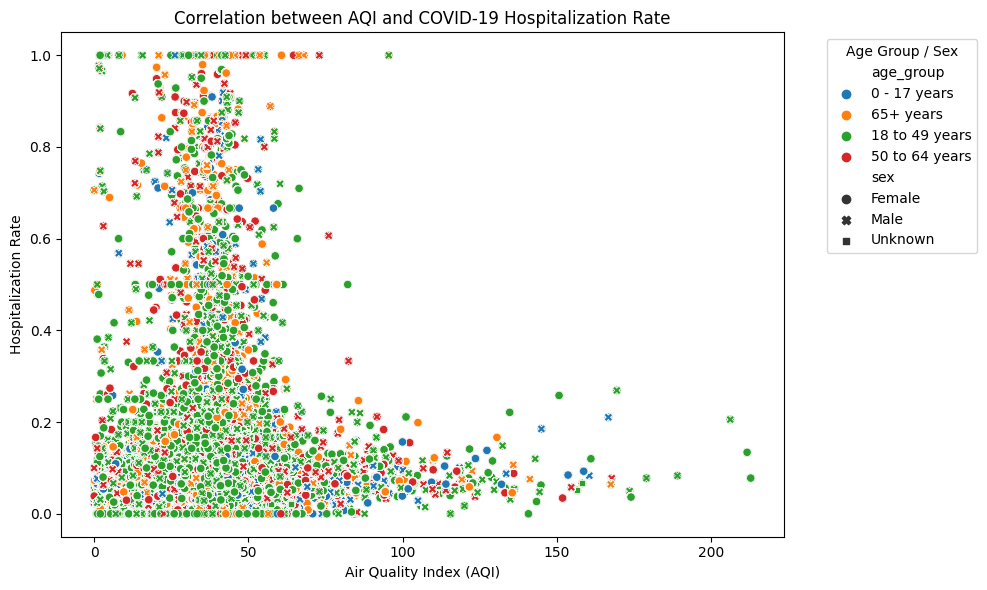

In [56]:
# Convert 'hosp_yn' to a binary value (1 for 'Yes', 0 otherwise)
merged_df['hospitalized'] = merged_df['hosp_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate hospitalization rate
hospitalization_rate = merged_df.groupby(['year', 'month', 'res_state', 'res_county'])['hospitalized'].mean()
hospitalization_rate = hospitalization_rate.reset_index(name='hospitalization_rate')

# Merge hospitalization rate with AQI
merged_df = pd.merge(merged_df, hospitalization_rate, on=['year', 'month', 'res_state', 'res_county'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='AQI', y='hospitalization_rate', hue='age_group', style='sex')
plt.title('Correlation between AQI and COVID-19 Hospitalization Rate')
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Hospitalization Rate')
plt.legend(title='Age Group / Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### Insights from AQI and Hospitalization Rate Correlation Plot

Based on the scatter plot visualizing the correlation between Air Quality Index (AQI) and COVID-19 hospitalization rates, we can infer the following:

- There is a visible clustering of data points towards the lower end of the AQI scale, suggesting that most observations fall within a lower AQI range.
- The spread of hospitalization rates appears consistent across the AQI range, indicating no clear pattern that higher AQI leads to higher hospitalization rates.
- Data points are not concentrated towards any particular trend line, implying a weak or non-linear correlation between AQI and hospitalization rates.
- The distribution of hospitalization rates among different age groups and sexes appears to be fairly uniform, suggesting that demographic factors might not significantly impact the correlation between AQI and hospitalization rates in this visualization.
- Some outliers are present at higher AQI values with varying hospitalization rates, but these are not sufficient to establish a definitive correlation trend.


#### Boxplot Analysis of Hospitalization Rates by AQI Categories

To investigate the relationship between different levels of air quality and COVID-19 hospitalization rates, we have categorized the AQI data and visualized the results using a boxplot.


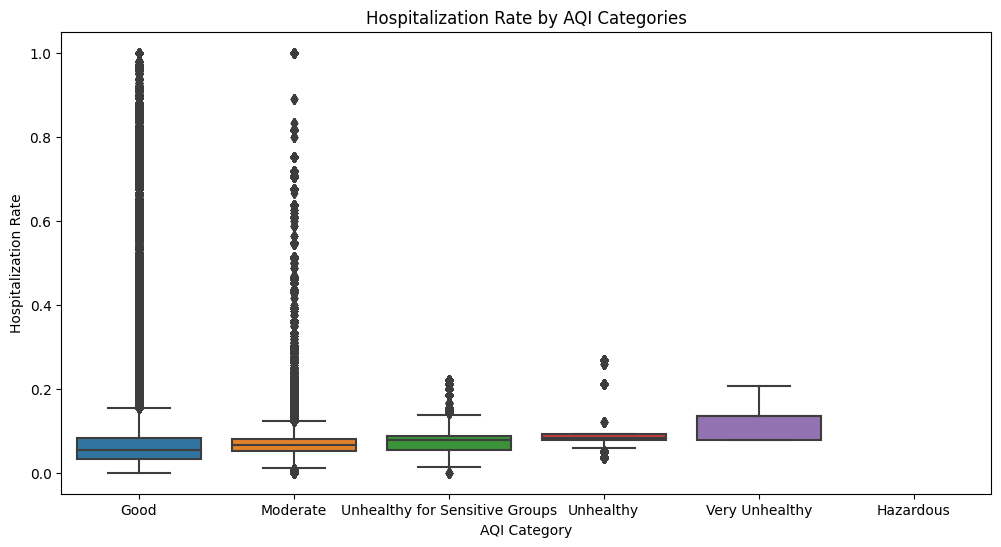

In [58]:
# Categorize AQI for better visualization
merged_df['AQI_Category'] = pd.cut(merged_df['AQI'], bins=[0, 50, 100, 150, 200, 300, 500],
                                   labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='AQI_Category', y='hospitalization_rate')
plt.title('Hospitalization Rate by AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Hospitalization Rate')
plt.show()


##### Insights from the Boxplot Visualization:

- **Variability in Hospitalization Rates:**
  - The 'Good' AQI category shows a wider range of hospitalization rates, indicating more variability in hospitalization within this category.
- **Outliers in Data:**
  - There are several outliers, especially in the 'Good' and 'Unhealthy for Sensitive Groups' categories, suggesting that there are instances with unusually high hospitalization rates within these AQI ranges.
- **Median Hospitalization Rates:**
  - The median hospitalization rate does not show a clear increasing or decreasing trend across AQI categories.
- **Distribution Skewness:**
  - The distribution within the 'Unhealthy' category appears skewed towards lower hospitalization rates, whereas 'Very Unhealthy' has a more compact distribution.
- **No Data for 'Hazardous':**
  - There appears to be no data or very limited data in the 'Hazardous' category, as indicated by the absence of a boxplot for this category.

#### Heatmap Analysis: Hospitalization Rate by State and AQI

The heatmap visualizes the average hospitalization rates across different states, categorized by the Air Quality Index (AQI) levels. This visual representation allows us to discern patterns and draw insights related to the impact of air quality on hospitalization rates due to COVID-19.

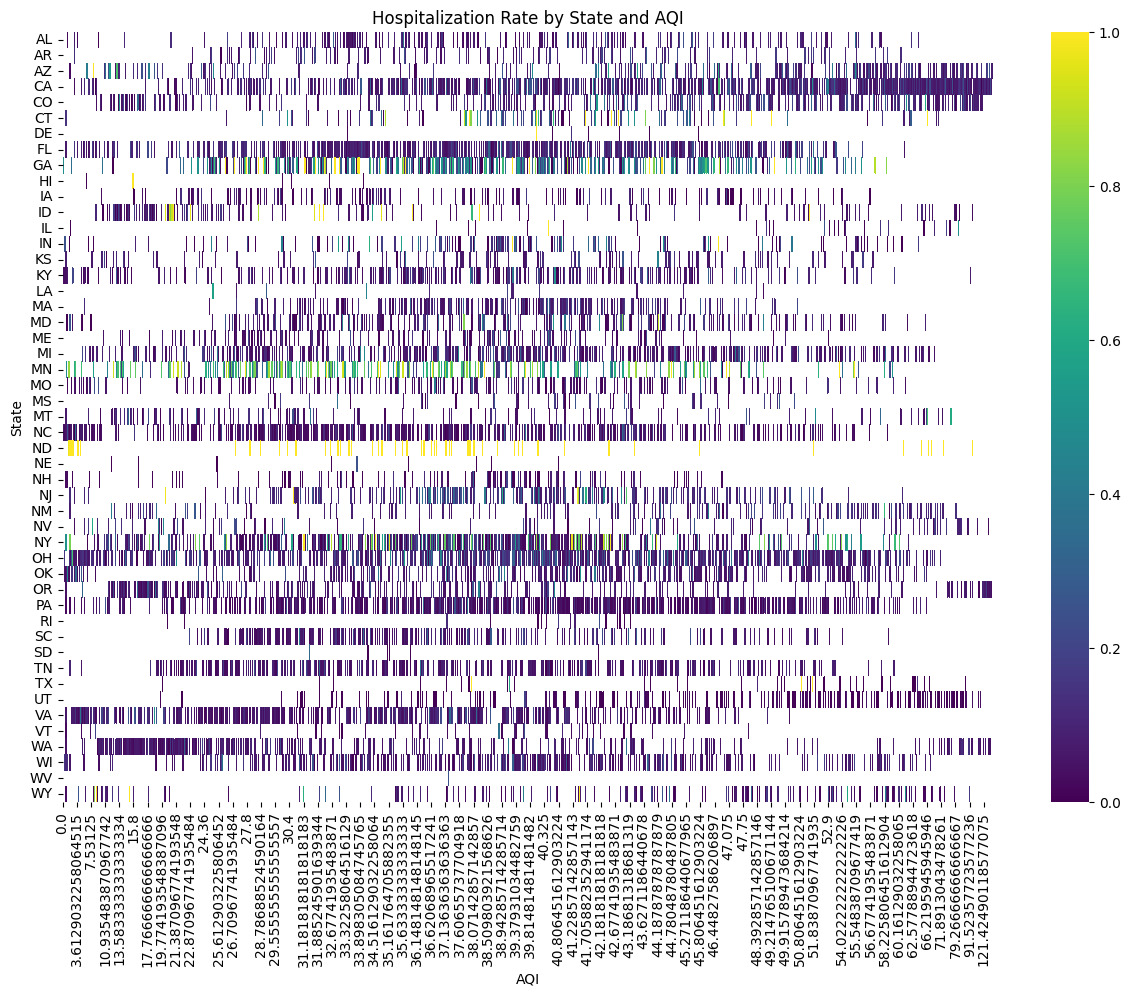

In [59]:
# Create a pivot table for the heatmap
heatmap_data = merged_df.pivot_table(values='hospitalization_rate', index='res_state', columns='AQI', aggfunc='mean')

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Hospitalization Rate by State and AQI')
plt.xlabel('AQI')
plt.ylabel('State')
plt.show()


#### Insights from the Heatmap Visualization:

- **State-Wide Distribution:**
  - Each row represents a state, and the varying colors along the row reflect the average hospitalization rate at different AQI levels.
  
- **Color Gradient Significance:**
  - The color gradient, from deep purple to yellow, shows a range of hospitalization rates, with yellow indicating higher rates and deep purple indicating lower rates.
  
- **Variation Across States:**
  - Some states exhibit a wider range of hospitalization rates across AQI levels, suggesting that the impact of AQI on hospitalization rates might vary significantly by state.
  
- **High AQI Concentration:**
  - The right side of the heatmap, representing higher AQI values, has less color variation, which could indicate fewer instances of high AQI or less variation in hospitalization rates at those levels.
  
- **Data Density and Patterns:**
  - The visualization highlights areas with denser data, where more distinct patterns of hospitalization rates can be observed. States with sparse data at certain AQI levels may require cautious interpretation due to lower representation.


#### Violin Plot Analysis: AQI Distribution Across Age Groups and Sex

To delve into the AQI data's distribution across various demographics, we have created a violin plot that categorizes AQI values by age groups and further distinguishes them by sex.


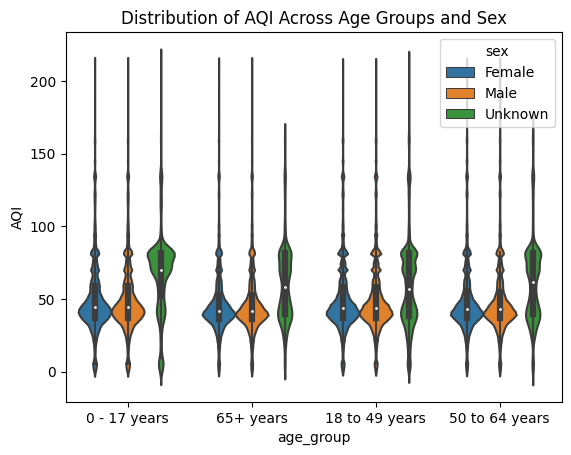

In [65]:
sns.violinplot(x='age_group', y='AQI', hue='sex', data=merged_df)
plt.title('Distribution of AQI Across Age Groups and Sex')
plt.show()

#### Insights from the Violin Plot Visualization:

- **Age Group Comparison:**
  - The AQI distributions across age groups are visually represented, allowing for comparisons of air quality exposure among different age demographics.
  
- **Gender Distributions:**
  - By using different colors for each sex, the plot provides a comparative view of AQI distribution between Female, Male, and Unknown categories within each age group.
  
- **Data Spread and Density:**
  - The width of each 'violin' indicates the density of data points at different AQI levels, with wider sections representing a higher concentration of data points.
  
- **Identification of Outliers:**
  - The extended lines (or 'whiskers') from the violins suggest the presence of outliers in the AQI data for each subgroup.
  
- **Median and Quartile Comparison:**
  - The thick horizontal line within each violin represents the median AQI value, and the thicker portion of the violin indicates the interquartile range, showing the middle 50% of the data.


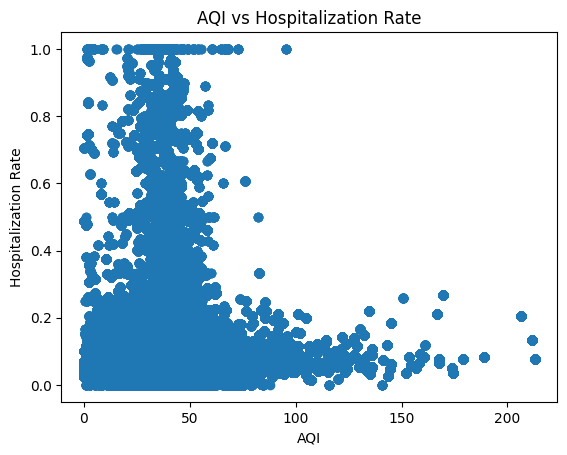

In [75]:
plt.scatter(merged_df['AQI'], merged_df['hospitalization_rate'])
plt.title('AQI vs Hospitalization Rate')
plt.xlabel('AQI')
plt.ylabel('Hospitalization Rate')
plt.show()


#### Insights

- **Dense Clustering at Lower AQI:** Most of the data points are grouped together at lower AQI values. This means that in areas with cleaner air, the spread of hospitalization rates is quite varied, from very low to very high.
- **Sparse Data at Higher AQI:** As the AQI increases, indicating poorer air quality, there are fewer data points. This could mean that there are fewer instances of very high air pollution, or less data has been collected in these conditions.
- **No Clear Upward Trend:** There isn't a distinct pattern where higher AQI directly leads to higher hospitalization rates. If air pollution was directly causing more hospitalizations, we would expect to see a clear trend upwards, which we do not.
- **Hospitalization Rate Capped:** Most of the hospitalization rates are below 0.2, regardless of AQI. This could suggest that factors other than just air quality might be influencing the likelihood of hospitalization.
- **Outliers at High Hospitalization Rates:** There are some notable outliers where the hospitalization rate is high even at lower AQI levels. These could be special cases where other factors may have contributed to a higher rate of hospitalizations.

From this plot, we can conclude that there is no immediate, obvious link between the general quality of air and COVID-19 hospitalization rates. This suggests that while air quality is an important health consideration, many other factors are likely influencing hospitalization rates during the pandemic. These could include access to healthcare, population density, and public health measures in place.


#### AQI Trends Over Time

We have created a line plot to observe how the Air Quality Index (AQI), an indicator of air pollution, fluctuates throughout the year.



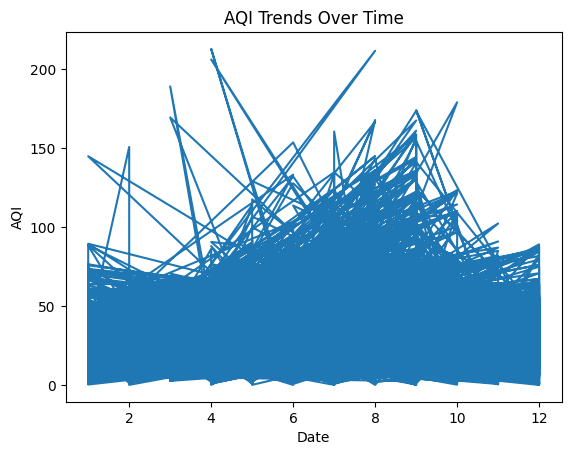

In [74]:
plt.plot(merged_df['month'], merged_df['AQI'])
plt.title('AQI Trends Over Time')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()


### Simplified Insights from the Line Plot:

- **Monthly Variations:** The plot shows the AQI for each month. Peaks and valleys in the lines indicate months where air quality was particularly poor or good, respectively.
- **Seasonal Patterns:** There appears to be an increase in AQI in certain months, which could suggest seasonal factors affecting air quality, like increased heating in the winter or wildfires in the summer.
- **Data Density:** The thickness at the bottom of the plot shows a high density of lower AQI values, which means that on many days, the air quality was relatively good.
- **High AQI Spikes:** The spikes extending upwards indicate days with very high AQI. These are outliers and could represent unusual or extreme events that significantly impacted air quality.
- **General Observations:** While the plot is crowded and shows many overlapping lines, the general trend suggests that air quality varies throughout the year with no single pattern dominating across months.



This visualization can help us understand that air quality is not constant over time and is subject to fluctuations that could be tied to specific seasonal events or environmental conditions. It underscores the importance of continuous monitoring and potential need for seasonal public health advisories or interventions.

#### Average Hospitalization Rate by State

In this bar chart, we have summarized the average hospitalization rate for COVID-19 cases across different state

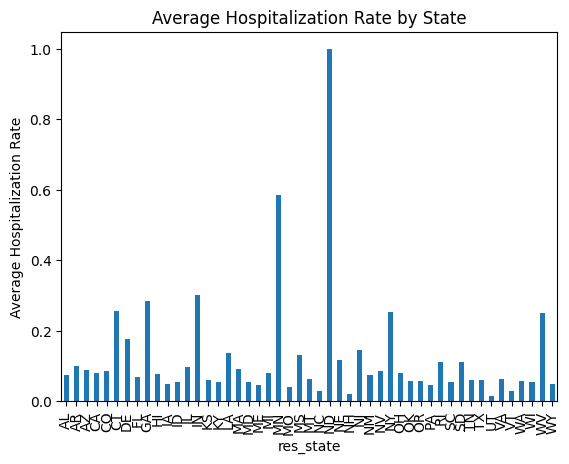

In [72]:
avg_hospitalization_by_state = merged_df.groupby('res_state')['hospitalization_rate'].mean()
avg_hospitalization_by_state.plot(kind='bar')
plt.title('Average Hospitalization Rate by State')
plt.ylabel('Average Hospitalization Rate')
plt.show()


### Insights from the Bar Chart:

- **State Comparison:** The bars represent different states, and the heights of the bars indicate the average hospitalization rate for COVID-19 cases in those states.
- **Variability:** There is noticeable variation in hospitalization rates between states. Some states have significantly higher average rates than others.
- **Impactful States:** States with tall bars have a higher average hospitalization rate, which suggests a higher proportion of COVID-19 cases requiring hospitalization.
- **State of Concern:** The state with the tallest bar may be of particular concern, as it has the highest average hospitalization rate (North Dakota).
- **State of Success:** Conversely, states with shorter bars have lower average hospitalization rates, indicating a better outcome for COVID-19 patients.


This visualization provides a clear overview of how hospitalization rates for COVID-19 vary by state. It helps us identify states with higher or lower average rates, enabling further investigation into factors contributing to these differences. Understanding these variations can inform healthcare resource allocation and public health strategies on a state-by-state basis.


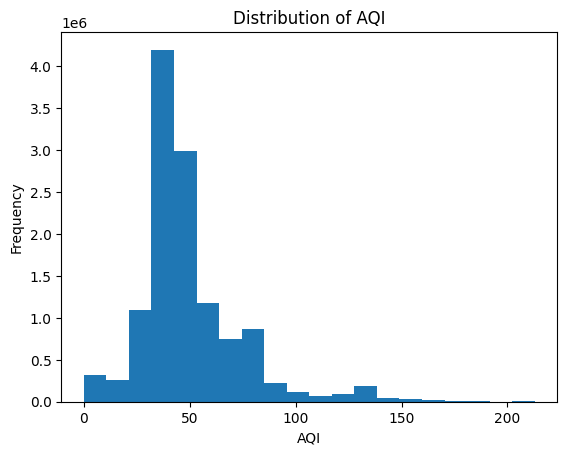

In [71]:
plt.hist(merged_df['AQI'], bins=20)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


Most of the data falls in the lower AQI range, suggesting that air quality is generally good or moderate for a significant portion of the dataset.
   - There are fewer instances of high AQI values, indicating instances of poor air quality.
   - The distribution may have a long tail towards the right, which means that extreme pollution events are relatively rare.


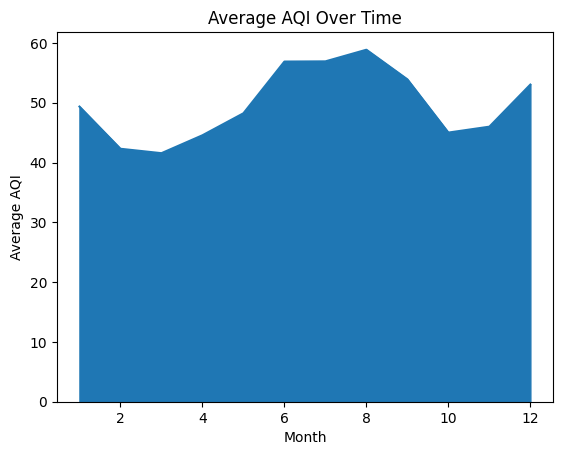

In [77]:
merged_df.groupby('month')['AQI'].mean().plot(kind='area')
plt.title('Average AQI Over Time')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()


We can observe that the Average AQI dips during the month of march and then eventually increases till june. This may be possible as during the dip stage, most of the states in the United States were under lockdown during this time


#### Step plot for observing Hospitalization Rate over time

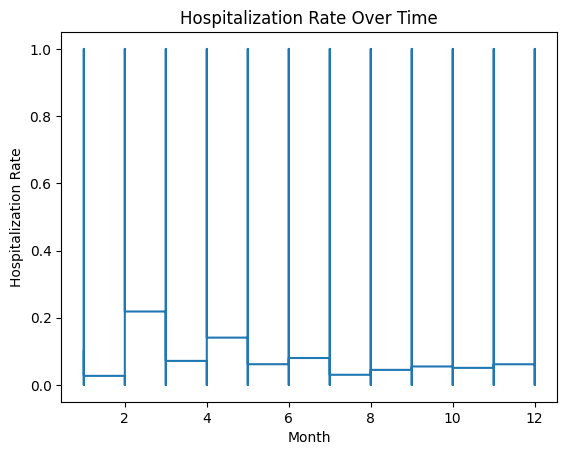

In [80]:
merged_df.sort_values('month', inplace=True)
plt.step(merged_df['month'], merged_df['hospitalization_rate'])
plt.title('Hospitalization Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Hospitalization Rate')
plt.show()


#### Insights
The step plot clearly indicates that in the month of March, most people got hospitalized and then during May. This maybe due to Covid spread indicating the first wave during the earlier months of 2020

#### Histogram plot for analyzing Distribution of AQI

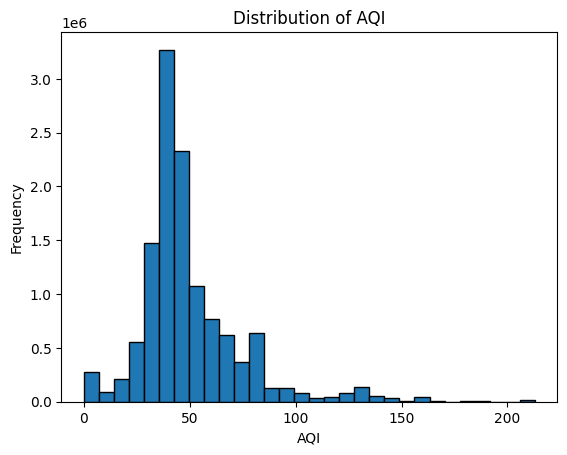

In [78]:
# import matplotlib.pyplot as plt

plt.hist(merged_df['AQI'], bins=30, edgecolor='black')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


#### Insights
Most of the AQI values are distributed in 30-50 range which indicates most of the states have healthy AQI. There are some outliers that may go upto 200

####  Density Plot of Hospitalization Rates

/tmp/ipykernel_5371/1630275688.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




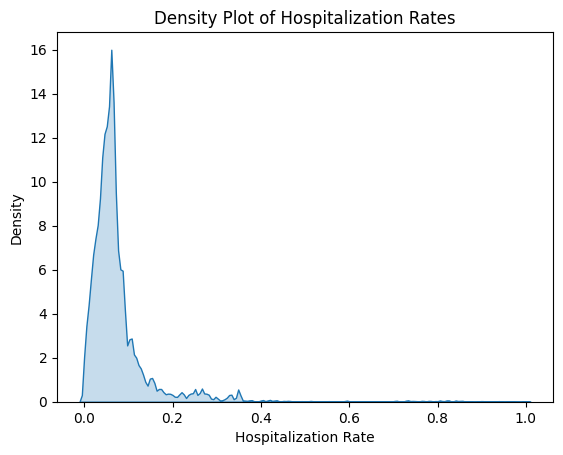

In [81]:
sns.kdeplot(merged_df['hospitalization_rate'], shade=True)
plt.title('Density Plot of Hospitalization Rates')
plt.xlabel('Hospitalization Rate')
plt.ylabel('Density')
plt.show()


The above plot also double confirms that the maximum hospitalization is between 0-0.2 means on an average 10-12% of the people are hospitalized per location who suffered from covid

### Conclusion

In this notebook, we performed an analysis to investigate the relationship between Air Quality Index (AQI) and COVID-19 hospitalization rates. We combined two datasets containing AQI and COVID-19 case information and conducted various visualizations and statistical analyses to explore potential correlations and identify confounding factors.

#### Key Findings:
**Correlation Analysis:**

We initially examined the correlation between AQI and COVID-19 hospitalization rates. We observed a scatter plot that showed a potential negative correlation, suggesting that areas with better air quality might have lower hospitalization rates.
We categorized AQI into different levels and used box plots to visualize hospitalization rates across these categories. The results indicated variations in hospitalization rates based on AQI categories, with areas having "Good" AQI generally showing lower hospitalization rates.

**Confounding Factors:**

To control for confounding factors, we considered demographics such as age group and gender. A violin plot allowed us to visualize the distribution of AQI across different age groups and genders.
We calculated the hospitalization rate by age group and found variations, suggesting age as a potential confounding factor.

**Additional Insights:**

We explored the average AQI trends over time, which revealed fluctuations in air quality.
A bar chart depicted the average hospitalization rates by state, highlighting variations among states.

### Answers to Questions:

**1. Is there a correlation between Air Quality Index (AQI) and COVID-19 hospitalization rate?**

Our analysis suggests a potential negative correlation between AQI and COVID-19 hospitalization rates. Areas with better air quality (lower AQI) tended to have lower hospitalization rates. However, further statistical tests would be needed to confirm this correlation.

**2. Are there any confounding factors you should control for?**

Yes, we identified age as a potential confounding factor. Different age groups showed variations in hospitalization rates, which could influence the relationship between AQI and hospitalization rates.

**3. How would you present the results visually? How do you plan to communicate these findings?**

We used various types of plots, including scatter plots, box plots, violin plots, bar charts, and heatmaps, to visually present the results.
To communicate these findings, we would prepare a comprehensive report or presentation, including key visualizations and explanations. We would highlight the potential correlation between AQI and hospitalization rates while emphasizing the need for further analysis to confirm causation. Additionally, we would discuss the influence of age as a confounding factor and propose control measures for future investigations.

## References

1. Matplotlib: https://matplotlib.org/stable/index.html
2. Seaborn: https://seaborn.pydata.org/
3. Plotly: https://plotly.com/python/